# 11 - Modelos e Distribuições Binomiais
**Objetivo da aula**: ao fim desta aula, o aluno será capaz de aplicar distribuições binomiais para avaliar situações reais.

## Texto introdutório

Já sabemos que podemos jogar uma moeda para cima e avaliar sua probabilidade de "dar cara". Podemos enviesar nossa moeda e chegar a uma probabilidade:

$$
P(H) = p,
$$

e, portanto, a probabilidade de dar "coroa" é:

$$
P(T) = 1-p = q.
$$

Uma propriedade interessante de moedas enviesadas é que elas se comportam de uma maneira parecida com alguns outros fenômenos - estes, possivelmente muito mais relevantes que uma moeda literal. Por exemplo, quando temos clientes em um e-commerce, cada um deles tem uma probabilidade $p$ de efetuar uma compra. Tal qual as moedas, raramente a compra de um cliente influencia diretamente o outro (ao menos no curto prazo), e também, se o site não for modificado e se não houver ações de marketing, essa probabilidade de compra $p$ deve ficar constante.

Assim como é difícil prever o comportamento de uma única jogada de moeda, também é difícil prever o comportamento de um único cliente. Porém, podemos tirar conclusões interessantes sobre o comportamento de um conjunto de jogadas de moeda, ou de um conjunto de vários clientes. Em especial, gostaríamos de saber: se meu website receber 1000 visitas, quantas compras devem ser esperadas - ou no caso das moedas, se jogarmos 1000 moedas, quantas vezes devo ter o resultado "cara"?

Pode ser mais fácil pensarmos num exemplo:

Num caso bastante pequeno, por exemplo, com 3 jogadas de moedas (ou 3 clientes), podemos ter os resultados:
| Jogada 1 | Jogada 2 | Jogada 3 |
| --- | --- | --- |
| H | H | H |
| H | H | T |
| H | T | H |
| T | H | H |
| H | T | T |
| T | H | T |
| T | T | H |
| T | T | T |

Se $P(H)=p$, então a probabilidade de encontrarmos o resultado HHH é igual a $P(HHH)=P(H)P(H)P(H)=p^3$. Pelo mesmo raciocínio, a probabilidade de HHT é $P(HHT)=P(H)P(H)P(T)=p^2q$.

Agora, veja: para o primeiro caso ($P(HHH)$), temos exatamente a probabilidade de jogar 3 moedas e encontrar 3 caras. Para o segundo, temos a probabilidade de jogar 3 moedas e encontrar 2 caras e uma coroa, *exatamente nesta ordem*. O nosso problema de contar "caras" (ou "compras"), porém, não depende da ordem: a pergunta se refere a "quantas caras (ou compras) eu devo esperar", e não à ordem específica delas.

De acordo com nossa tabela, há 3 possibilidades em que há duas caras e uma coroa. Cada uma delas tem probabilidade igual, então, a probabilidade de encontrar duas caras e uma coroa é igual a $3p^2q$. Podemos, na verdade, pensar em cada uma dessas possibilidades como um dos *anagramas* de HHT.

### Como surge a distribuição binomial

Então temos duas ideias. A primeira é que a probabilidade de encontrar $k$ caras em $n$ jogadas em *uma ordem específica* é $p^k q^{n-k}$. A segunda é que o total de possibilidades em que há o mesmo número de caras e coroas é o conjunto de todos os anagramas da sequência de Hs e Ts que deu origem à probabilidade anterior, isto é, há $\frac{n!}{k!(n-k)!}$ possibilidades para o mesmo número de caras.

Então, se $X$ é o número de caras que saem em $n$ jogadas:

$$
P(X=k)=
\frac{n!}{k!(n-k)!} p^k (q)^{(n-k)}
$$

Mais formalmente, dizemos que uma variável aleatória $X$ segue uma distribuição binomial utilizando a seguinte notação: $X$~$Bin(n,p)$. Essa notação pode ser lida como: $X$ segue uma distribuição binomial com $n$ tentativas e $p$ como probabilidade de sucesso em cada evento independente. A distribuição binomial modela a número de sucessos (o evento de interesse) em uma determinada quantidade de tentativas. 

### Condições da distribuição binomial

Para que um experimento possa ser modelado por uma distribuição binomial, ele precisa ter as seguintes propriedades:

- ser uma contagem de $n$ repetições (ou tentativas, ou ensaios) idênticas;
- cada repetição tem apenas 2 resultados possíveis: um é denominado sucesso (o resultado de interesse, que não necessariamente é positivo) e o outro, fracasso;
- a probabilidade de sucesso para cada ensaio é denominada $p$ e será constante em cada repetição. Consequentemente, a probabilidade de fracasso $(1-p)$ também não varia de tentativa para tentativa;
- as tentativas são independentes.

### Esperança e Variância

Se $X$~$Bin(n,p)$, o valor esperado $E(X)$ e a variância $Var(X)$ são dados por:

$\qquad\qquad E(X) = np$

$\qquad\qquad Var(X) = np(1-p)$

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.

# Exemplo: jogando uma moeda várias vezes

Tenho uma moeda que tem probabilidade $p$ de dar cara. Se eu jogo a moeda $n$ vezes, quantas caras vou conseguir?

In [5]:
def varias_moedas(n, p):
    caras = 0
    for _ in range(n):
        deu_cara = np.random.random() < p
        if deu_cara:
            caras = caras + 1
    return caras

In [6]:
print(varias_moedas(100, 0.5))

50


## Repetindo o experimento...

Toda vez que chamo a função `varias_moedas`, encontro um valor diferente. Como será que esses valores se distribuem ao longo de vários ($m$) ensaios?

In [7]:
def varios_ensaios(m, n, p):
    quantas_caras = np.zeros(n+1)
    for _ in range(m):
        n_caras = varias_moedas(n, p)
        quantas_caras[n_caras] += 1
    return quantas_caras

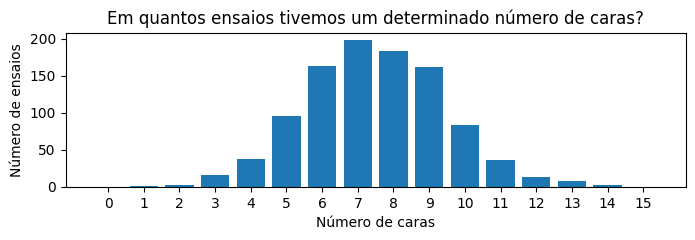

In [8]:
m = 1000 # Número de ensaios
n = 15 # Moedas jogadas por ensaio
p = 0.5 # Probabilidade de dar cara em uma moeda
quantas_caras = varios_ensaios(m, n, p) # Quantas vezes aconteceu cada número de caras ao longo dos ensaios
plt.figure(figsize=(8,2))
plt.bar(range(len(quantas_caras)), quantas_caras)
plt.xticks(range(len(quantas_caras)))
plt.xlabel('Número de caras')
plt.ylabel('Número de ensaios')
plt.title('Em quantos ensaios tivemos um determinado número de caras?')
plt.show()

---

## Pacote Python para distribuições

In [9]:
from scipy import stats

n, p = 25, 0.5

# Gerar o resultado de *um* ensaio com a distribuição
print(stats.binom.rvs(n, p))

# Gerar o resultado de vários ensaios com a distribuição
print(stats.binom.rvs(n, p, size=10))

12
[10 12 13 13 11 11 12 10 11 15]


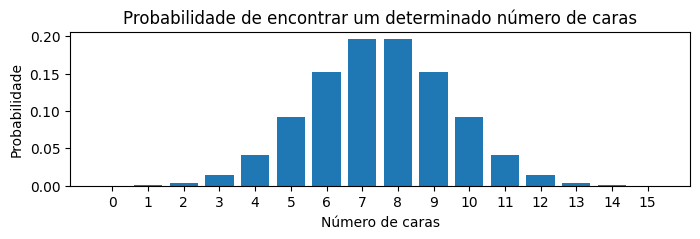

In [10]:
# Gerar a função de distribuição de probabilidade
# Veja: agora eu estou trabalhando com *esperança* (do modelo!) e não mais com amostras!
n = 15 # Moedas jogadas por ensaio
p = 0.5 # Probabilidade de dar cara em uma moeda
quantas_caras = [stats.binom.pmf(y, n, p) for y in range(0,n+1)] # Probabilidade de encontrar cada número de caras ao longo dos ensaios
plt.figure(figsize=(8,2))
plt.bar(range(len(quantas_caras)), quantas_caras)
plt.xticks(range(len(quantas_caras)))
plt.xlabel('Número de caras')
plt.ylabel('Probabilidade')
plt.title('Probabilidade de encontrar um determinado número de caras')
plt.show()

In [11]:
# E a probabilidade de encontrar um valor de caras *menor ou igual* a um determinado valor?
# P(x<=k | n,p)
n, p = 15, 0.5
p_ = stats.binom.cdf(8, n, p)

<div id="ex1"></div>

# Exercício 1
*Objetivo: associar parâmetros de uma distribuição estatística teórica a aspectos de um problema prático*

Nesta atividade, trabalharemos com dados históricos dos jogos do Corinthians. Como somos torcedores muito exigentes, achamos que somente vitórias são resultados favoráveis, ao passo que derrotas ou empates são sempre desfavoráveis.

Estamos assumindo que cada jogo do Corinthians tem uma probabilidade $p$ de ter um resultado favorável. Também, vamos assumir que cada jogo é independente dos outros, isto é, "novo dia, novo jogo".

Então, observe que cada jogo do Corinthians é equivalente a *jogar uma moeda*. Portanto, observar vários jogos do Corinthians equivale a observar uma distribuição binomial.

Usando os dados abaixo, encontre os parâmetros $n$ e $p$ dessa distribuição binomial:

In [12]:
# n é o numero de jogadas totais e p a probabilidade de vitoria

import pandas as pd
df = pd.read_csv('dados/corinthians/jogos_do_corinthians.csv')
n = len(df)
k = df[df['VITORIA'] == 1]
p = len(k) / n   
print(p,n)



0.5190713101160862 6030


# Exercício 2
*Objetivo: calcular comportamentos prováveis usando a pmf*

Quando temos uma distribuição teórica, ganhamos a "vantagem" de poder calcular probabilidades usando modelos matemáticos.

A função `pmf` (probability mass function) do pacote `scipy.stats` calcula $P(X=k)$ à partir de parâmetros da distribuição. Nesse caso, queremos trabalhar com a distribuição binomial, então os parâmetros são os valores de $n$ e $p$. O código abaixo, por exemplo, calcula a probabilidade de encontrar $k$ caras em $n$ jogadas de moeda, com $P(H)=p$:

In [13]:
import scipy.stats as st
k = 4
n = 11
p = 0.562
x = st.binom.cdf(k, n, p)
print(1-x)

0.8464941990972179


Com base neste código, calcule a probabilidade de, se sortearmos 10 jogos aleatórios do Corinthians, encontramos exatamente 8 vitórias.

# Exercício 3
*Objetivo: usar probabilidades cumulativas para evidenciar eventos*

Outra função importante do pacote `stats` é a `cdf` (cumulative distribution function). Essa função calcula $P(x \leq k)$. Por exemplo, para saber a probabilidade de encontrarmos 0 ou 1 caras em 5 jogadas, podemos usar tanto a soma explícita da `pmf` quanto a `cdf`:

In [14]:
import scipy.stats as st
p1 = st.binom.pmf(0, 5, 0.5) + st.binom.pmf(1, 5, 0.5)
p2 = st.binom.cdf(1, 5, 0.5) 
print(p1, p2)

0.18749999999999994 0.1875


Usando a função `cdf`, calcule a probabilidade de, se sortearmos 20 jogos do corinthians:

1. Encontrarmos 5 ou menos vitórias
1. Encontrarmos 5 ou mais vitórias
1. Encontrarmos 10 a 15 vitórias

In [15]:
# Faça seu código aqui
import scipy.stats as st
p1 = st.binom.pmf(0, 5, 0.5) + st.binom.pmf(1, 5, 0.5)


# Exercício 4
*Objetivo: usar a CDF para calcular diferenças entre grupos*

Algumas pessoas dizem que jogar "em casa" dá uma vantagem natural aos times, e, ao jogar fora de casa, o time está em desvantagem. Isso acontece devido ao cansaço dos jogadores ao viajar, à presença da torcida, ou talvez até a particularidades do próprio campo de futebol. Neste exercício, vamos verificar se essa hipótese é real.

Neste momento, já sabemos parâmetros para uma distribuição binomial que modela todos os jogos do Corinthians. 

(a) Encontre o número de jogos ($n_c$) e o número de vitória ($k_c$) relacionado aos jogos do Corinthians "em casa".

(b) Assumindo que a probabilidade de vitória ($p$) é aquela que calculamos no exercício 1, qual é a probabilidade $p_0$ de encontrarmos $k_c$ ou mais vitórias em $n_c$ jogos?

(c) Veja que calculamos $p_0$ *sob a hipótese* de que a probabilidade de vitória em jogos em casa é $p$. O que o valor que você encontrou para $p_0$ indica sobre essa hipótese?

(d) O que pode ser dito *sobre a hipótese inicial* à partir dessa probabilidade calculada?

(e) Calcule o valor $p_c = k_c/n_c$. Esse é um *novo modelo*, que usa apenas dados relacionados a jogos "em casa". Usando esse novo modelo, refaça o exercício (b). Como esse resultado se contrasta com o anterior?

In [16]:
nc = len(df [df['TIME MANDANTE']=='CORINTHIANS'])
kc =len(df [ (df['TIME MANDANTE']=='CORINTHIANS') & (df['VITORIA']==1) ])
print(nc, kc)
p = 1-st.binom.cdf(kc-1, nc, 0.51)
print(p)

pc = 1-st.binom.cdf(kc-1, nc, kc/nc)
print(pc)

2867 1750
0.0
0.5082004953316556


# Exercício 5
*Objetivo: usar um teste inferencial para encontrar viéses em uma população*

A probabilidade que calculamos no exercício 4 pode ser generalizada para: "a probabilidade de observar um efeito tão ou mais extremo quanto o que observamos, sob a hipótese de que um modelo específico se aplica". Se esse probabilidade é muito baixa, provavelmente o modelo não se aplica - ou, ao menos, o fenômeno é muito raro.

Vamos aplicar essa ideia para outro cenário. Suponha uma sala de aula com 20 pessoas. Se não há nenhum tipo de viés de gênero, então a probabilidade de uma pessoa matriculada nesse curso ser homem ou mulher é igual (a 50%). Sob esta hipótese:

(a) Qual é a probabilidade de haver 12 ou mais mulheres nesse grupo? Se observarmos 12 mulheres, é seguro rejeitar a hipótese de que não há viés de gênero?

(b) Qual é a probabilidade de haver 17 ou mais mulheres nesse grupo? Se observarmos 17 mulheres, é seguro rejeitar a hipótese de que não há viés de gênero?

(c) Repita o experimento usando dados da sua sala de aula.

(d) Repita o experimento usando dados da sua sala de aula, mas usando um modelo estimado com dados de uma outra sala de aula do seu mesmo curso (por exemplo, a turma do ano ou semestre anterior ao seu).


In [19]:
import scipy.stats as st
# exercicio 3

p1 = st.binom.cdf(k =5, n=15, p=0.554)
p2 = st.binom.cdf(k=2, n=15,p= 0.554)

a = p1 - p2
print(a)

0.07145508337600319


In [20]:
import math
# exercicio 4
dp = math.sqrt(15*0.521*(1-0.521))
print(dp)

1.934782933561282


In [22]:
# exercicio 2
p1 = st.binom.cdf(13, 82, 0.1)
print(1 - p1)

0.03236120896059724
